## Temperature Forecast Project

#### Problem Statement:

### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


#### Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

#### Importing the required libraries:

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset:

In [3]:
df = pd.read_csv('temperature.csv')

# looking for the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
# Splitting the Date column into day, month, and year

df[["day", "Month", "Year"]] = df['Date'].str.split("-", expand=True)

df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,Month,Year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


In [5]:
# Dropping the Date column

df = df.drop(['Date'], axis = 1)

df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


In [6]:
# Checking for the columns:

df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'Month', 'Year'],
      dtype='object')

In [7]:
# Checking for the shape of the dataset:

df.shape

(7752, 27)

- The dataset contains 7752 rows and 27 columns including the target column.

- Next_Tmax and Next_Tmin are the target columns. 

In [8]:
# Checking for the missing (or null) values.

df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
day                  2
Month                2
Year                 2
dtype: int64

- The dataset contains missing values.
- We'll handle the missing values later.

In [9]:
# Checking for the datatype of the columns:

df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                  object
Month                object
Year                 object
dtype: object

- The dataset contains float datatype and object datatype.

In [10]:
# Checking for the information of the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


- The dataset contains 27 columns.
- There are missing values in the dataset.
- The dataset contains 3 object datatype and 24 float datatype.

#### Handling the missing values:

In [11]:
for c in df.columns:
    value = df[c].median()
    df[c] = df[c].replace(np.nan, value)

In [12]:
# Checking for the missing values again

df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
Month               0
Year                0
dtype: int64

- The missing values are removed successfully.

#### Data Visualization:

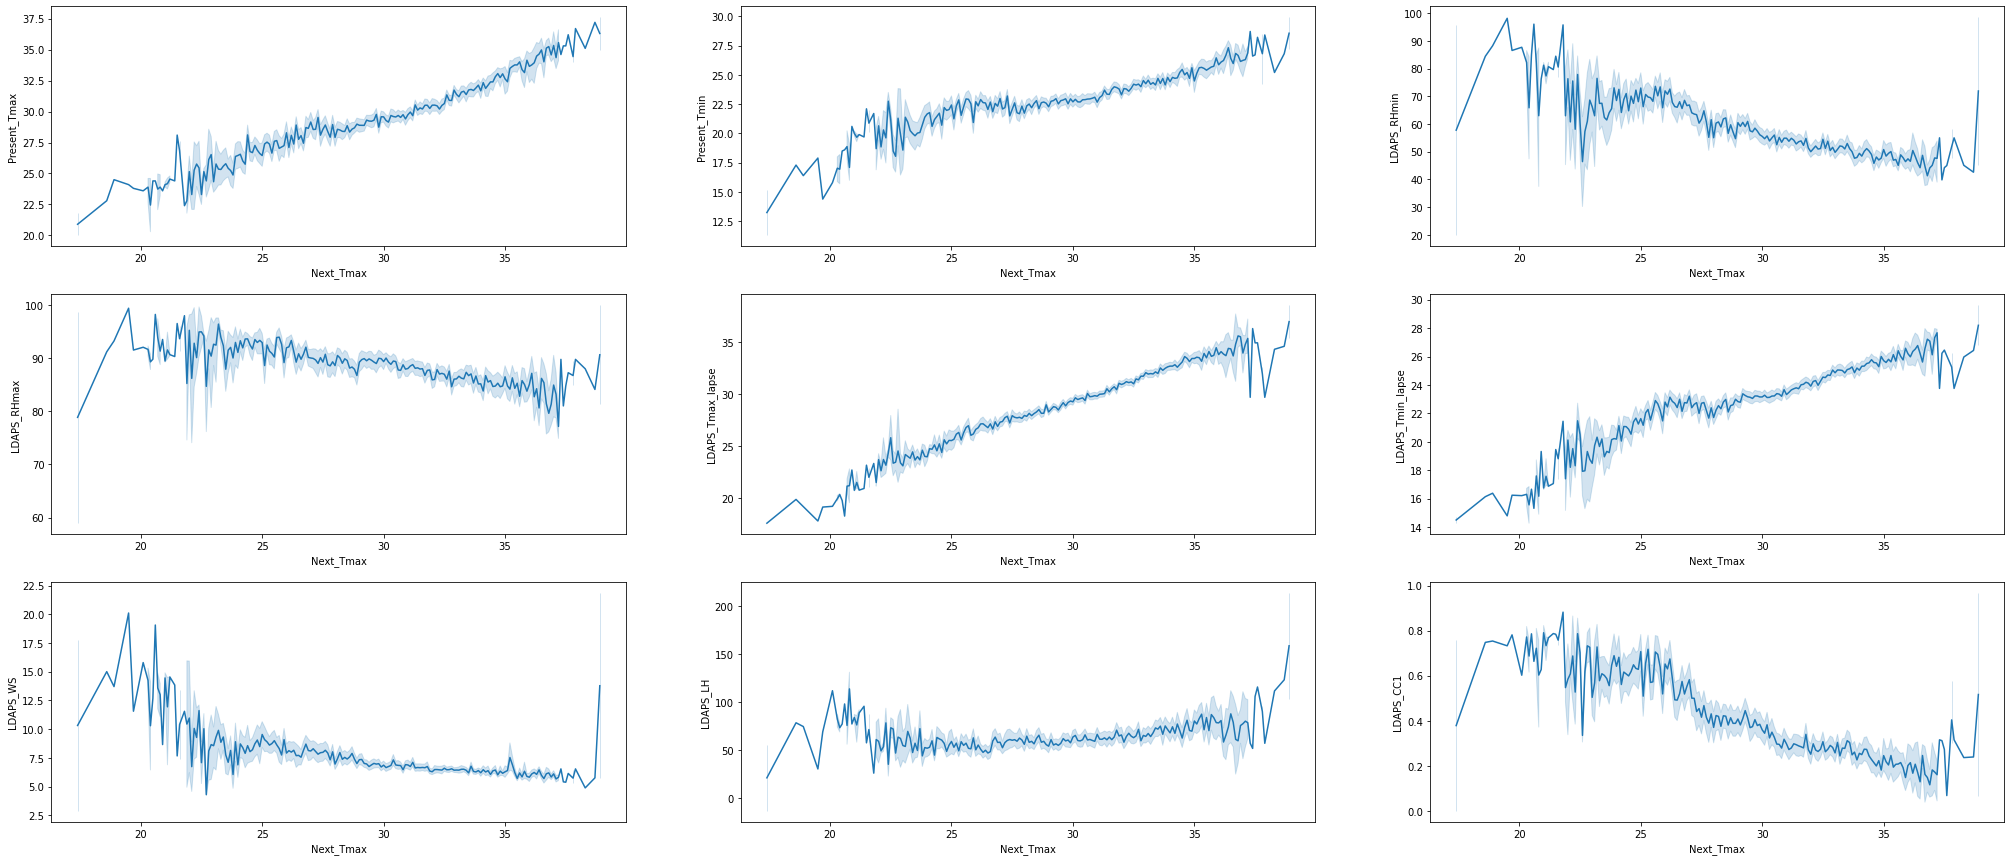

In [19]:
fig,ax=plt.subplots(3,3,figsize=(35,15))
sns.lineplot(y=df['Present_Tmax'], x=df['Next_Tmax'],ax=ax[0,0])
sns.lineplot(y=df['Present_Tmin'], x=df['Next_Tmax'],ax=ax[0,1])
sns.lineplot(y=df['LDAPS_RHmin'], x=df['Next_Tmax'],ax=ax[0,2])
sns.lineplot(y=df['LDAPS_RHmax'], x=df['Next_Tmax'],ax=ax[1,0])
sns.lineplot(y=df['LDAPS_Tmax_lapse'], x=df['Next_Tmax'],ax=ax[1,1])
sns.lineplot(y=df['LDAPS_Tmin_lapse'], x=df['Next_Tmax'],ax=ax[1,2])
sns.lineplot(y=df['LDAPS_WS'], x=df['Next_Tmax'],ax=ax[2,0])
sns.lineplot(y=df['LDAPS_LH'], x=df['Next_Tmax'],ax=ax[2,1])
sns.lineplot(y=df['LDAPS_CC1'], x=df['Next_Tmax'],ax=ax[2,2])
plt.show()

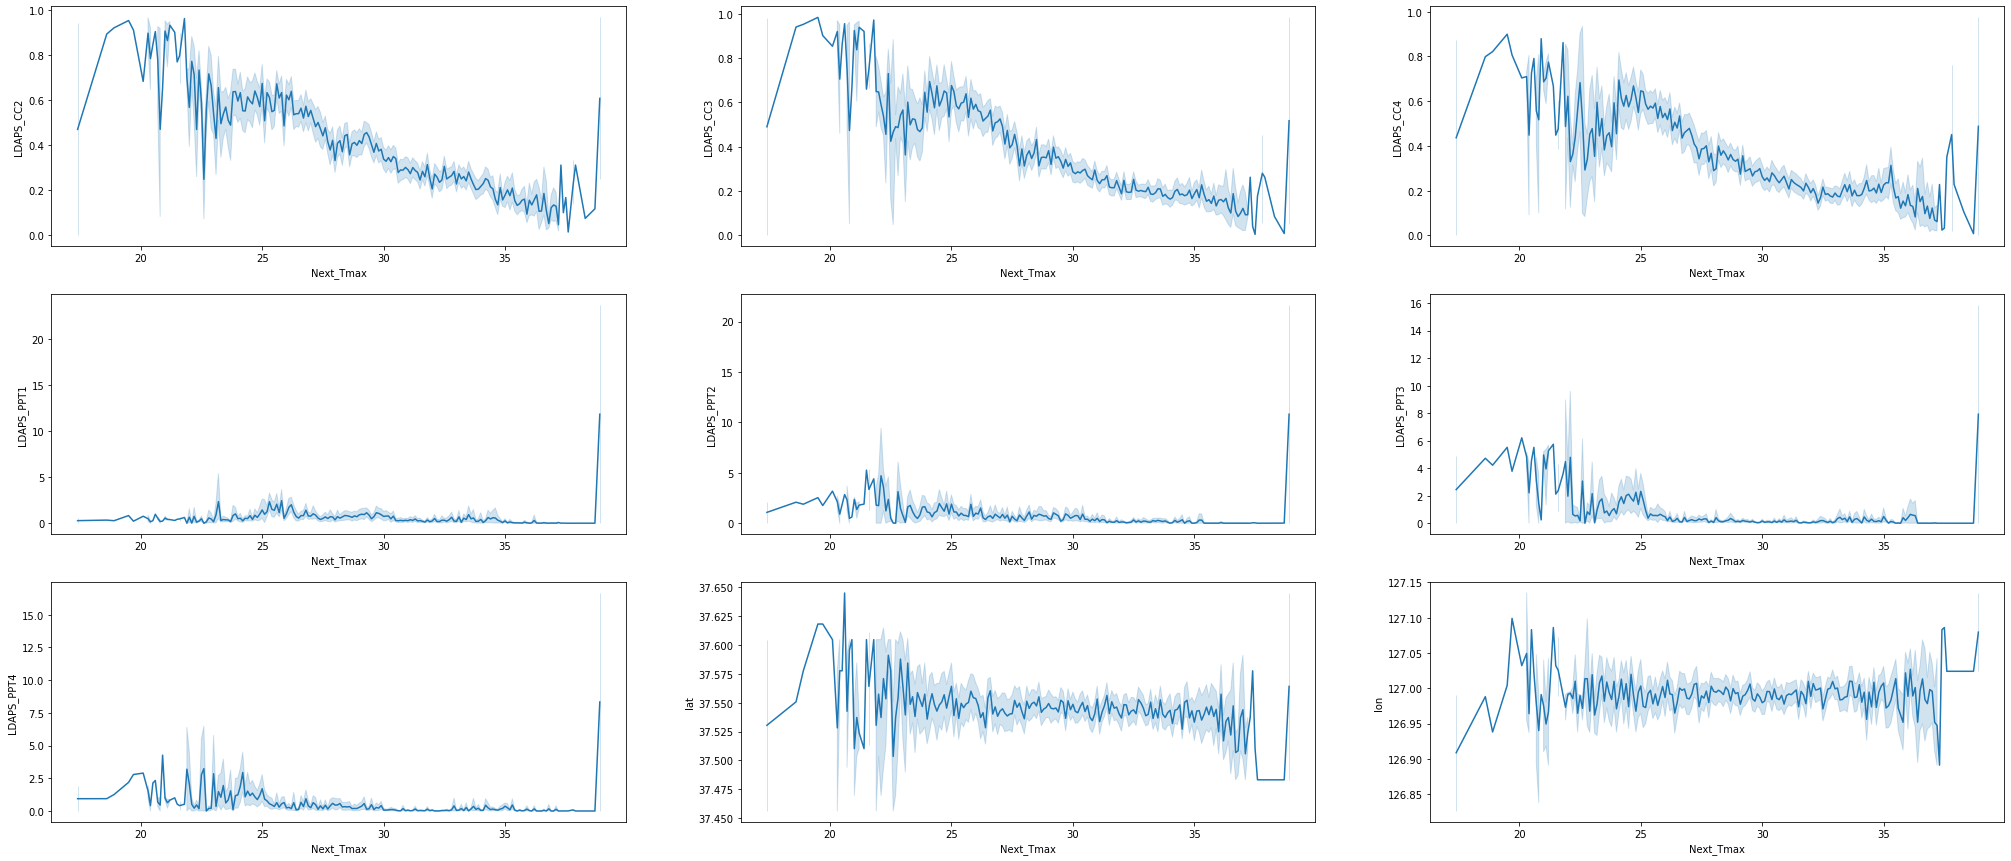

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(35,15))
sns.lineplot(y=df['LDAPS_CC2'], x=df['Next_Tmax'],ax=ax[0,0])
sns.lineplot(y=df['LDAPS_CC3'], x=df['Next_Tmax'],ax=ax[0,1])
sns.lineplot(y=df['LDAPS_CC4'], x=df['Next_Tmax'],ax=ax[0,2])
sns.lineplot(y=df['LDAPS_PPT1'], x=df['Next_Tmax'],ax=ax[1,0])
sns.lineplot(y=df['LDAPS_PPT2'], x=df['Next_Tmax'],ax=ax[1,1])
sns.lineplot(y=df['LDAPS_PPT3'], x=df['Next_Tmax'],ax=ax[1,2])
sns.lineplot(y=df['LDAPS_PPT4'], x=df['Next_Tmax'],ax=ax[2,0])
sns.lineplot(y=df['lat'], x=df['Next_Tmax'],ax=ax[2,1])
sns.lineplot(y=df['lon'], x=df['Next_Tmax'],ax=ax[2,2])
plt.show()

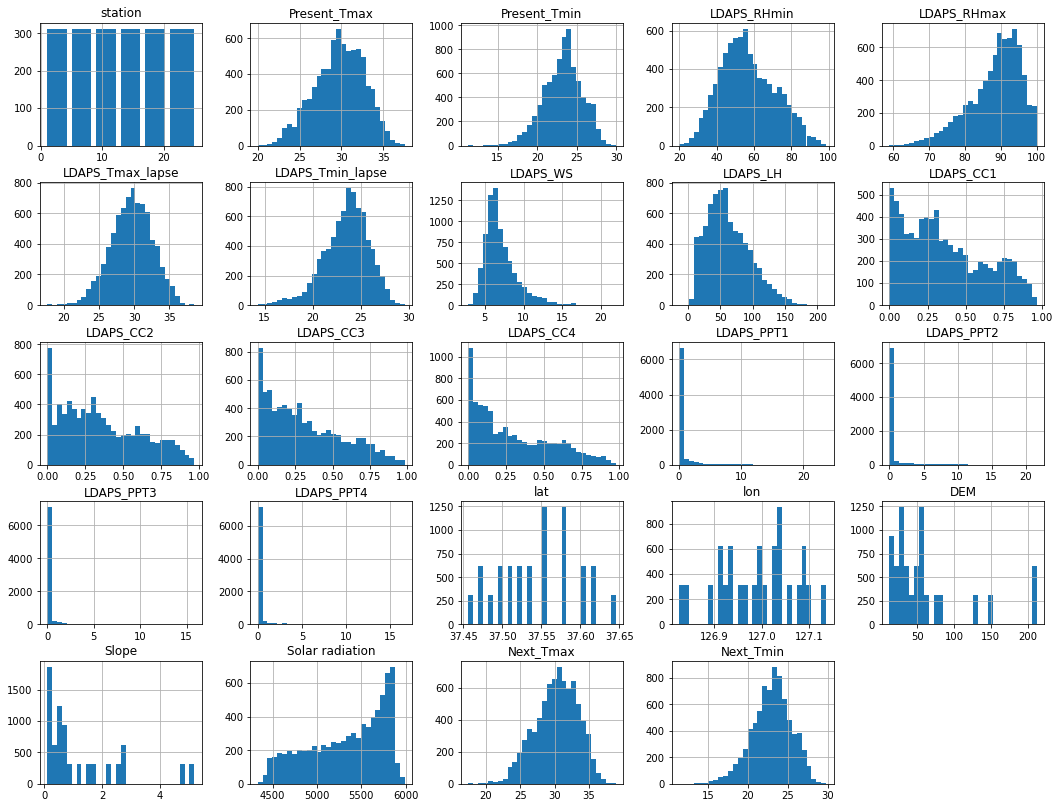

In [22]:
# Plotting the histogram for univariant analysis to check the normal distribution

df.hist(figsize=[18,14], bins=30, grid=True)
plt.show()

In [21]:
# Checking for the description of the dataset

df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.769401,23.226638,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,0.355658,0.317864,0.298499,0.586267,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275671,22.932804
std,7.210637,2.956583,2.403093,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,0.256845,0.249208,0.253211,1.937198,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122585,2.483296
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.049122,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


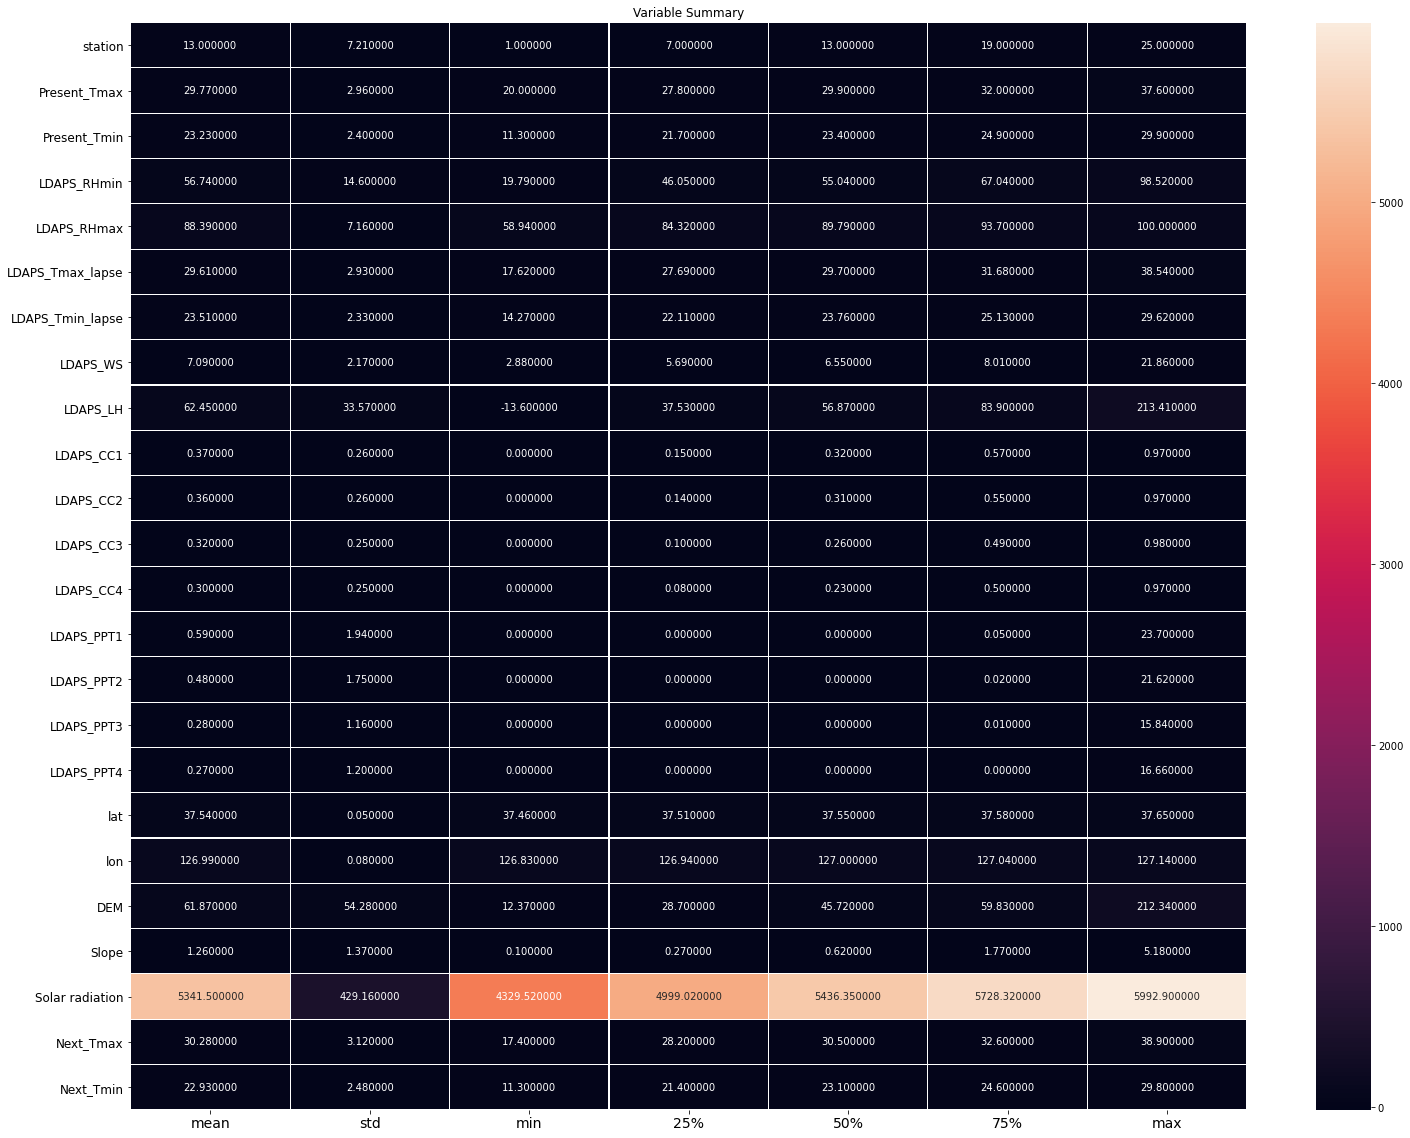

In [24]:
# Plotting heatmap for stastical summary table

plt.figure(figsize=[25,20])
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidths=0.2, annot=True, fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

In [25]:
# Checking for the correlation

df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112582,0.131525,-0.066729,-0.166953,0.069107,0.104753,0.005275,-0.133339,0.006917,0.003396,0.000694,0.006124,-0.002708,-0.008247,-0.012458,-0.010399,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107900,0.128216
Present_Tmax,0.112582,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,-0.313176,-0.214904,-0.145477,-0.142549,-0.111148,-0.101362,-0.122051,-0.101118,-0.052659,0.008990,-0.187138,-0.105884,-0.025401,0.610256,0.622700
Present_Tmin,0.131525,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,0.082000,0.088309,-0.005304,-0.047496,0.109085,0.064851,-0.049017,-0.065550,-0.078547,-0.043509,-0.250299,-0.146460,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.066729,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,0.613885,0.745482,0.689720,0.514163,0.262875,0.391110,0.240831,0.168797,0.087093,-0.076232,0.102108,0.123736,0.244643,-0.439171,0.094061
LDAPS_RHmax,-0.166953,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,0.436097,0.390879,0.226434,0.130008,0.267698,0.228398,0.134087,0.117376,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.069107,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,-0.438410,-0.523594,-0.541260,-0.429456,-0.111105,-0.242113,-0.188133,-0.160300,-0.042093,0.090665,-0.178895,-0.162332,0.047820,0.827473,0.587066
LDAPS_Tmin_lapse,0.104753,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,0.010691,0.047545,-0.044233,-0.080587,0.037727,0.000588,-0.088791,-0.094855,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588224,0.881074
LDAPS_WS,0.005275,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,0.289792,0.261386,0.243402,0.221066,0.153213,0.192427,0.162173,0.144550,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345578,-0.098730
LDAPS_LH,-0.133339,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,-0.146920,-0.263934,-0.245130,-0.172222,-0.012042,-0.077061,0.016483,0.020332,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155684,-0.056832
LDAPS_CC1,0.006917,-0.313176,0.082000,0.613885,0.436097,-0.438410,0.010691,0.289792,-0.146920,1.000000,0.779752,0.517702,0.361386,0.446635,0.389771,0.169130,0.092119,-0.008129,-0.006842,-0.014087,-0.020747,0.219264,-0.454771,-0.012732


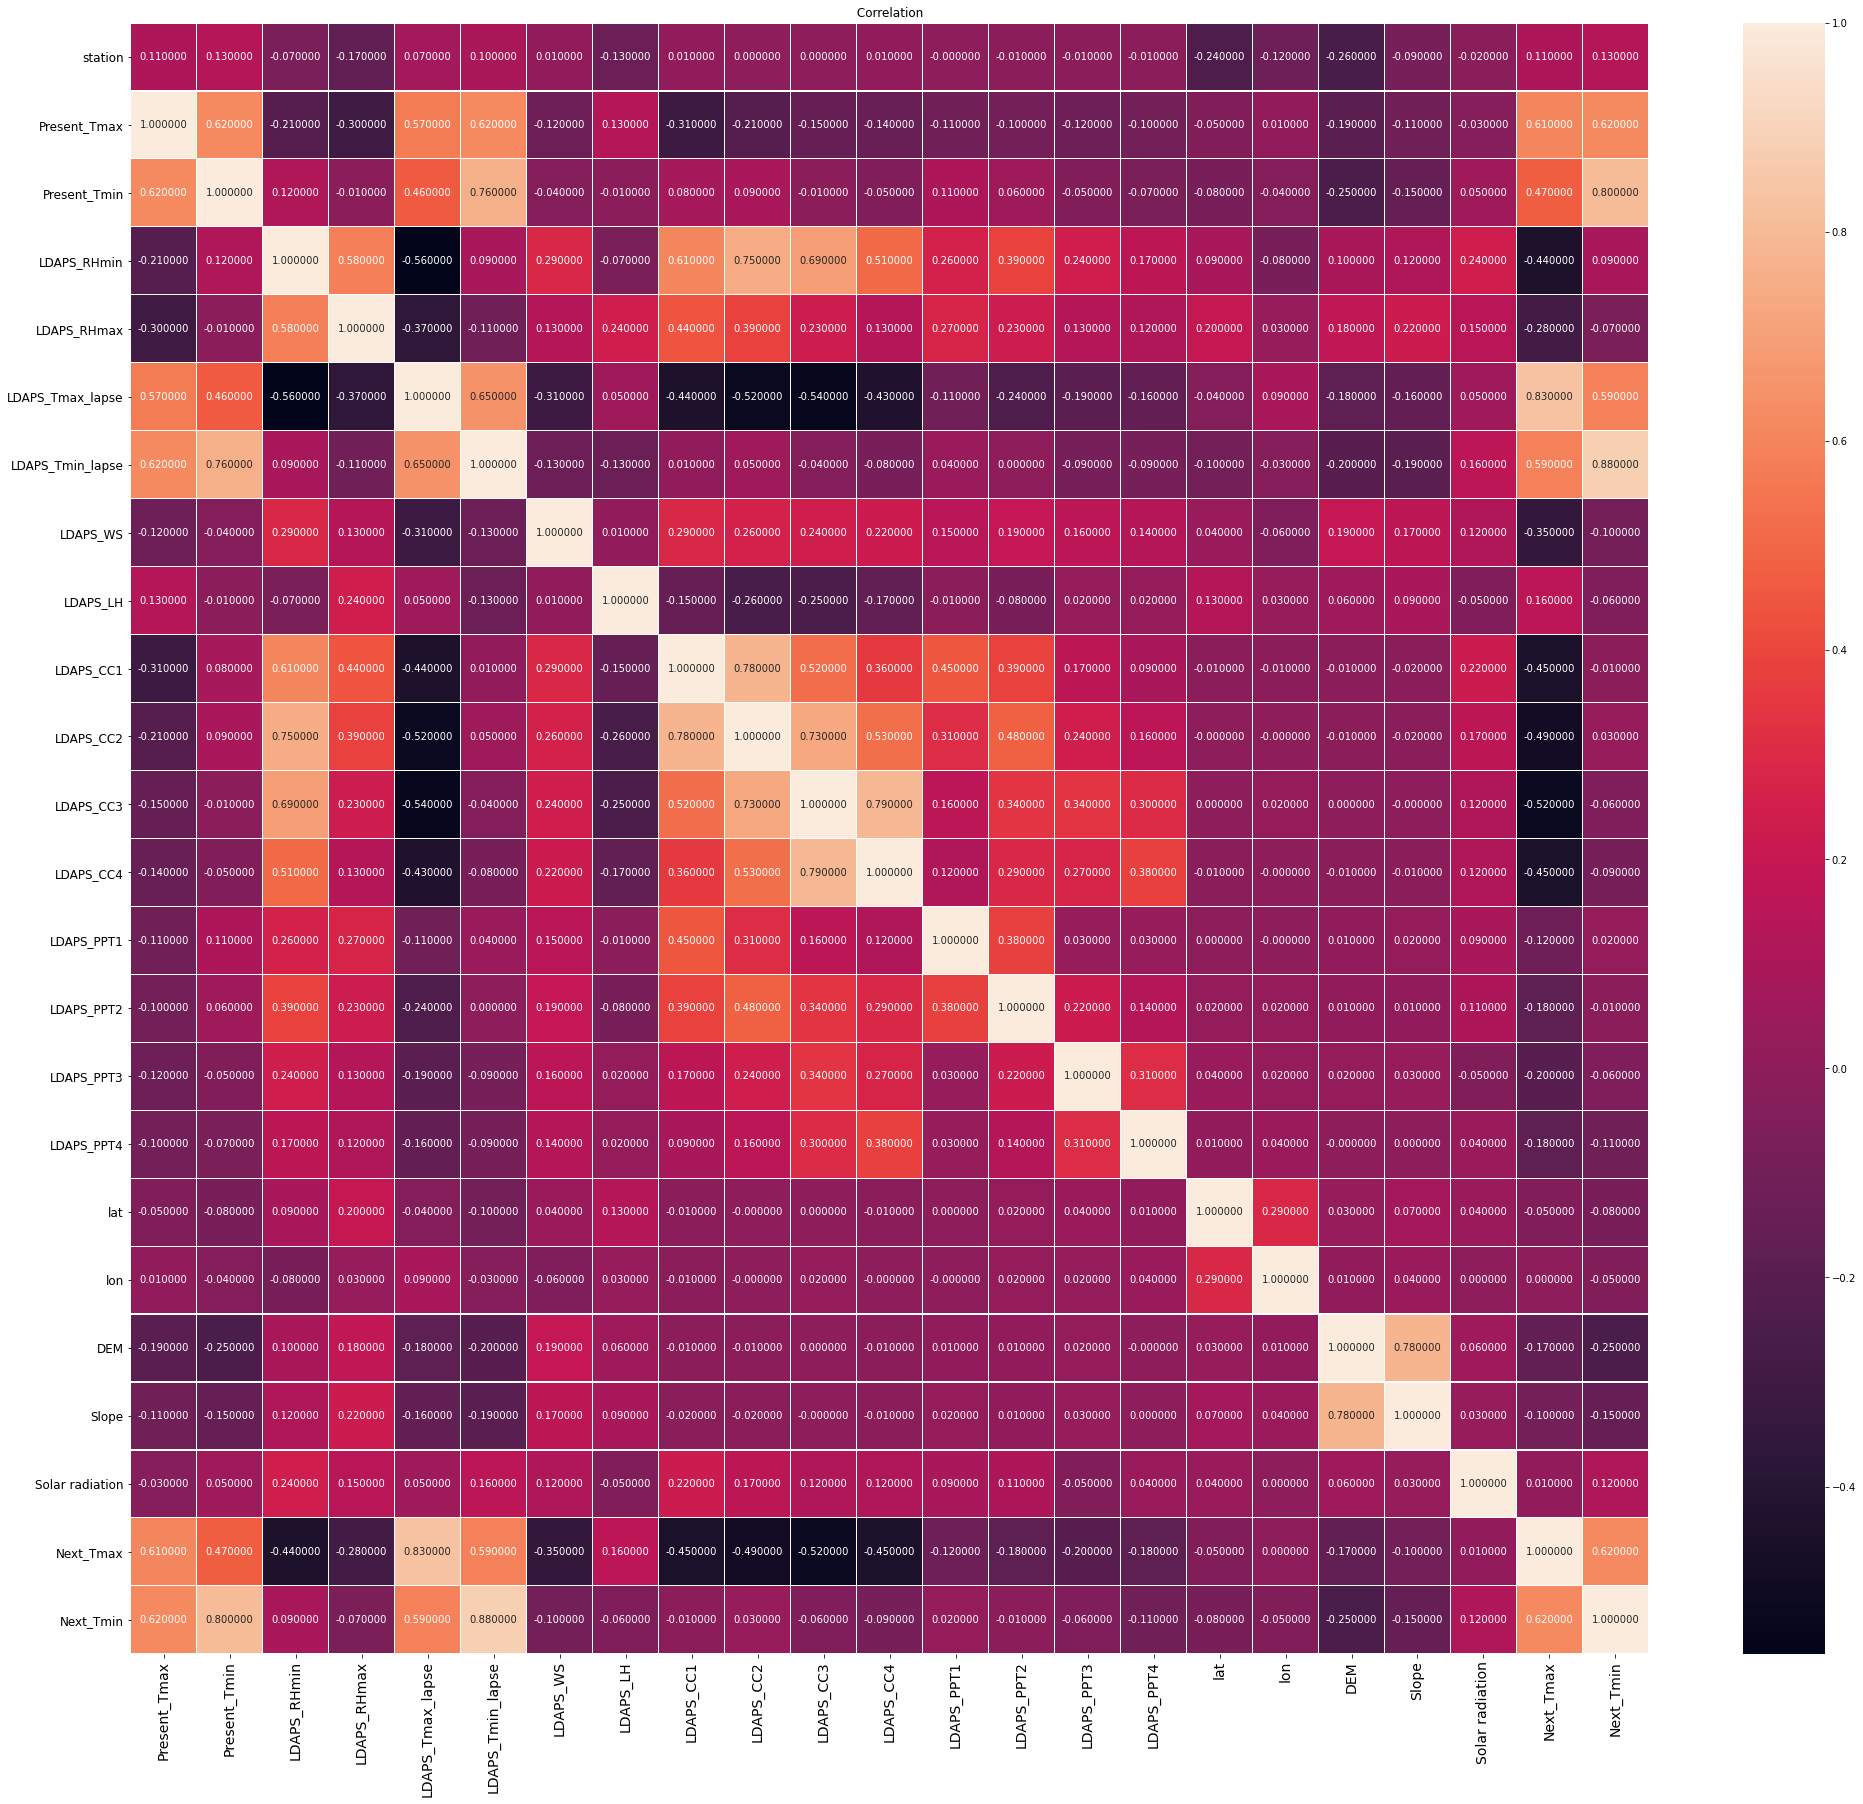

In [28]:
# Plotting heatmap for correlation table.

plt.figure(figsize=[34,30])
sns.heatmap(round(df.corr()[1:].transpose(),2), linewidths=0.2, annot=True, fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title(' Correlation ')

plt.show()

In [29]:
# Sorting correlation as per the Next_Tmax target column

corr_matrix = df.corr()
corr_matrix['Next_Tmax'].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827473
Next_Tmin           0.621434
Present_Tmax        0.610256
LDAPS_Tmin_lapse    0.588224
Present_Tmin        0.471723
LDAPS_LH            0.155684
station             0.107900
Solar radiation     0.008701
lon                 0.003076
lat                -0.053557
Slope              -0.102812
LDAPS_PPT1         -0.122365
DEM                -0.172614
LDAPS_PPT4         -0.181329
LDAPS_PPT2         -0.181556
LDAPS_PPT3         -0.196866
LDAPS_RHmax        -0.281282
LDAPS_WS           -0.345578
LDAPS_RHmin        -0.439171
LDAPS_CC4          -0.449457
LDAPS_CC1          -0.454771
LDAPS_CC2          -0.492615
LDAPS_CC3          -0.517125
Name: Next_Tmax, dtype: float64

- We can see that LDAPS_Tmax_lapse column is showing highest correlation with the target column Next_Tmax. It is 82% correlation can be considered as very strong correlation.

- Next_Tmin has 62% correlation with the target column (Next_Tmax), which can be considered as very strong correlation.

- Present_Tmax is showing 61% correlation which can be considered as very strong correlation.

- The minimum correlation is of LDAPS_CC3 column which is showing -51% correlation which can be considered as very weak bond.

In [30]:
# Sorting correlation as per the Next_Tmin target column

corr_matrix = df.corr()
corr_matrix['Next_Tmin'].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.881074
Present_Tmin        0.796657
Present_Tmax        0.622700
Next_Tmax           0.621434
LDAPS_Tmax_lapse    0.587066
station             0.128216
Solar radiation     0.120122
LDAPS_RHmin         0.094061
LDAPS_CC2           0.029829
LDAPS_PPT1          0.018645
LDAPS_PPT2         -0.010451
LDAPS_CC1          -0.012732
lon                -0.046580
LDAPS_CC3          -0.056604
LDAPS_LH           -0.056832
LDAPS_PPT3         -0.064651
LDAPS_RHmax        -0.070193
lat                -0.083577
LDAPS_CC4          -0.087510
LDAPS_WS           -0.098730
LDAPS_PPT4         -0.105625
Slope              -0.146963
DEM                -0.246977
Name: Next_Tmin, dtype: float64

- LDAPS_Tmin_lapse is showing 88% correlation with the target column Next_Tmin. This can be considerd as very strong bond.

- DEM is showing minimum correlation -24% with the target column Next_Tmin. This can be considerd as very weak bond.

#### Checking for the Outliers and Skewness in the dataset:

In [36]:
# Splitting the independent and dependent columns

x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y = df[['Next_Tmax', 'Next_Tmin']]

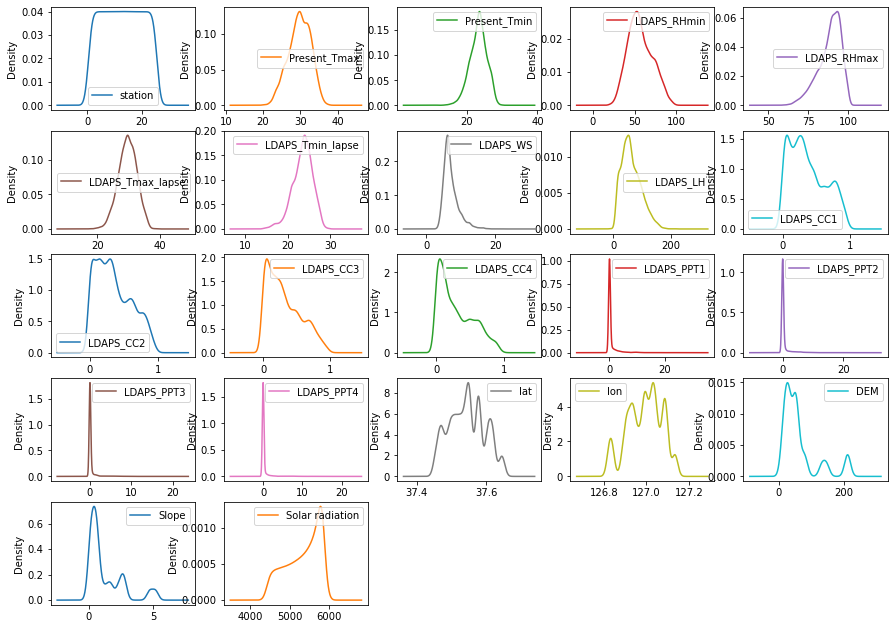

In [37]:
# checking the distribution plot.

x.plot(kind='density', subplots=True, layout=(5,5), legend=True, figsize=(15,11))
plt.show()

In [38]:
# Checking for the skewness

x.skew()

station             0.000000
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
day                -0.008928
Month              -0.195325
Year                0.000000
dtype: float64

#### Outcome of Skewness:

###### Skewness threshold is taken as +/-0.5. Columns having shewness:

1. LDAPS_RHmax
2. LDAPS_Tmin_lapse
3. LDAPS_WS
4. LDAPS_LH
5. LDAPS_CC3
6. LDAPS_CC4
7. LDAPS_PPT1 (Very High)
8. LDAPS_PPT2 (Very High)
9. LDAPS_PPT3 (Very High)
10. LDAPS_PPT4 (Very High)
11. DEM (Very High)
12. Slope (Very High)

#### Removing the skewness using power_transform method

In [39]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

station            -0.204565
Present_Tmax       -0.035123
Present_Tmin       -0.012211
LDAPS_RHmin        -0.017178
LDAPS_RHmax        -0.116481
LDAPS_Tmax_lapse   -0.009402
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC1           0.048127
LDAPS_CC2           0.046422
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.000000
lon                -0.198429
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
day                -0.216473
Month              -0.092081
Year               -0.000215
dtype: float64

#### Checking for the outliers:

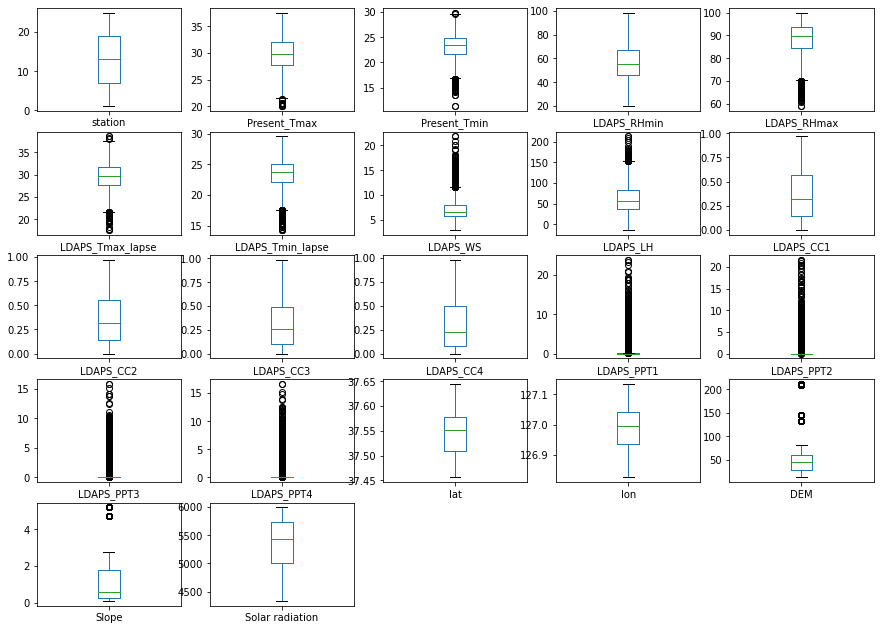

In [40]:
x.plot(kind='box', subplots=True, layout=(5,5), legend=True, figsize=(15,11))
plt.show()

- Outliers are present in the following columns:
    - Present_Tmax
    - Present_Tmin
    - LDAPS_RHmax
    - LDAPS_Tmax_lapse
    - LDAPS_Tmin_lapse
    - LDAPS_WS
    - LDAPS_LH
    - LDAPS_PPT1
    - LDAPS_PPT2
    - LDAPS_PPT3
    - LDAPS_PPT4
    - DEM
    - Slope

#### Scaleing the feature columns:

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.66431530e+00, -3.61725090e-01, -7.60168709e-01, ...,
         1.57185703e+00, -2.76761252e+00, -1.41439603e+00],
       [-1.52562236e+00,  7.20675064e-01, -6.76937265e-01, ...,
         1.57185703e+00, -2.76761252e+00, -1.41439603e+00],
       [-1.38692941e+00,  6.19200050e-01,  3.05300065e-02, ...,
         1.57185703e+00, -2.76761252e+00, -1.41439603e+00],
       ...,
       [ 1.66431530e+00, -2.22210036e+00, -2.42479758e+00, ...,
         1.57185703e+00,  1.00394980e+00,  1.41439603e+00],
       [ 0.00000000e+00, -3.30450051e+00, -4.96335662e+00, ...,
         1.80834518e-03, -8.81831360e-01,  0.00000000e+00],
       [ 0.00000000e+00,  2.64870034e+00,  2.77716765e+00, ...,
         1.80834518e-03, -8.81831360e-01,  0.00000000e+00]])

#### Data preprocessing:

In [43]:
# creating train test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### 1. LinearRegression:

In [45]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
predlr = lr.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], predlr[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], predlr[:,-2]))))

RMSE: 0.9960927457479382
RMSE: 1.5288202583428312


#### 2. DecisionTreeRegressor:

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], preddt[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], preddt[:,-2]))))

RMSE: 1.2464860324378964
RMSE: 1.641712295298145


#### 3. KNN:

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(x_train, y_train)
predknn = knn.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], predknn[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], predknn[:,-2]))))

RMSE: 0.9036916738824918
RMSE: 1.1706376917437096


#### 4. RandomForestRegressor:

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x_train, y_train)
predrf = rf.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], predrf[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], predrf[:,-2]))))

RMSE: 0.7984338033068947
RMSE: 1.0277110373807685


#### Chceking the cross validation score:

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
# using cross val for Linear Regression model.
lr_cv = cross_val_score(LinearRegression(), x, y, cv=5, scoring='neg_root_mean_squared_error')
result = np.absolute(lr_cv.mean())
print(result)

1.3852603186588295


In [51]:
# using cross val for Decision Tree Regressor model.
dt_cv = cross_val_score(DecisionTreeRegressor(), x, y, cv=5, scoring='neg_root_mean_squared_error')
result = np.absolute(dt_cv.mean())
print(result)

1.979161463009591


In [52]:
# using cross val for KNN model.
knn_cv = cross_val_score(KNeighborsRegressor(), x, y, cv=5, scoring='neg_root_mean_squared_error')
result = np.absolute(knn_cv.mean())
print(result)

1.7985986194114674


In [54]:
# using cross val for Random Forest Regressor model.
rf_cv = cross_val_score(RandomForestRegressor(), x, y, cv=5, scoring='neg_root_mean_squared_error')
result = np.absolute(rf_cv.mean())
print(result)

1.4102874484980237


- The difference between the RMSE and cross validation score is minimum for Linear Regression.
- So, Linear Regression model is performing better.

#### Hyperparameter tuning:

In [55]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [56]:
# Creating parameters for the tuning
param_grid = {'fit_intercept':['True', 'False'],
             'normalize':['True', 'False'],
             'n_jobs':['None', 1],
             'positive':['True', 'False']}

In [57]:
# Passing the created parameters to GridSearchCV

GCV = GridSearchCV(LinearRegression(), param_grid, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'n_jobs': ['None', 1], 'normalize': ['True', 'False'],
                         'positive': ['True', 'False']})

In [58]:
# Getting best parameters
GCV.best_params_

{'fit_intercept': 'True', 'n_jobs': 1, 'normalize': 'True', 'positive': 'True'}

#### Final Model:

In [59]:
# Building the model with best parameters
model = LinearRegression(fit_intercept=True, n_jobs=1, normalize=True, positive=True)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], prediction[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], prediction[:,-2]))))

RMSE: 1.0391342875717693
RMSE: 1.6966001629577976


Text(0, 0.5, 'Predictions')

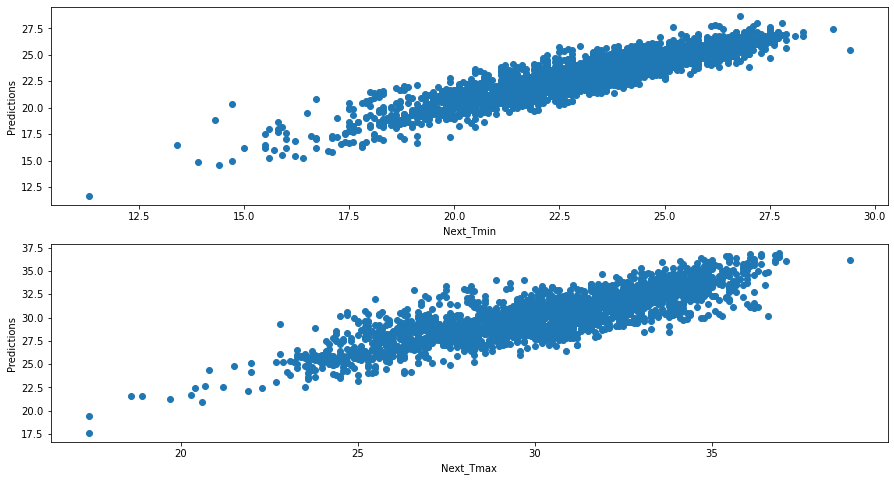

In [60]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))

# For target column Next_Tmin
axs[0].scatter(y_test.iloc[:,-1], prediction[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')

# For targetcolumn Next_Tmax
axs[1].scatter(y_test.iloc[:,-2], prediction[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

#### Saving the final model:

In [61]:
import pickle
filename = 'temp_forecast.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Conclusion:

In [62]:
final_prediction = pd.DataFrame({'Prediction(Next_Tmin)':prediction[:,-1],
                     'Next_Tmin':y_test.iloc[:,-1],
                     'Prediction(Next_Tmax)':prediction[:,-2],
                     'Next_Tmax':y_test.iloc[:,-2]})

final_prediction

,Prediction(Next_Tmin),Next_Tmin,Prediction(Next_Tmax),Next_Tmax
7197,25.556027,25.0,33.826145,32.6
2017,23.112848,24.8,32.110104,31.1
7185,24.940171,23.6,33.034616,31.9
5378,24.152795,26.0,30.589624,33.6
3782,23.614670,24.0,30.690785,31.2
7633,18.670065,18.7,26.894662,26.8
3572,22.202532,21.3,29.394479,30.2
5394,23.566005,25.4,30.103599,32.5
2336,24.403189,22.2,34.353066,34.0
5638,26.662149,26.6,33.944005,33.7
